# Yolo Text detection result visualization 

## Importing the Necessary library

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import re

## Useful function defination  

In [3]:
def get_bbox_from_text(text='',path=None):
    if path:
        with open(path,'r') as file:
            text = file.read()
    
    bbox=[]
    for line in text.split('\n')[0:-1]:
        box = line.split(' ')[1:]
        bbox.append([float(i) for i in box])
    
    return tuple(bbox)

def from_yolo_to_bbox(img,yolo_bbox):
    bbox=[]
    img_h, img_w, _ = img.shape
    for box in yolo_bbox:
        x1, y1 = int((box[0] + box[2]/2)*img_w), int((box[1] + box[3]/2)*img_h)
        x2, y2 = int((box[0] - box[2]/2)*img_w), int((box[1] - box[3]/2)*img_h)
        bbox.append([x1, y1, x2, y2])
    return tuple(bbox)
    
def draw_boxes(imgs, boxes,title='bounding box'):
    for box in boxes:
        x1, y1, x2, y2 = box
        cv2.rectangle(imgs, (x1, y1), (x2, y2), (0,255,0), 3)
    return imgs

In [4]:
def compareColorImage(img1, img2, isColor = 1):
    #fig,(ax1,ax2) = plt.subplots(1,2)
    fig = plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(20, 15)
    if(isColor ==1):
        ax1 =fig.add_subplot(1,2,1)
        plt.imshow(img1)
        ax1.set_title("original")
        ax1.axis('off')
       
        ax2 =fig.add_subplot(1,2,2)
        plt.imshow(img2)
        ax2.set_title("result")
        ax2.axis('off')
   
    else:
        ax1 =fig.add_subplot(1,2,1)
        plt.imshow(img1, cmap='gray')
        ax1.set_title("original")
        ax1.axis('off')
       
        ax2 = fig.add_subplot(1,2,1)
        plt.imshow(img2,cmap='gray')
        ax2.set_title("result")
        ax2.axis('off') 
def display_image_cv(img,window_name='Image'):
    res = isinstance(img, str)
    if res:
        img = cv2.imread(img)
        
    cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
    cv2.imshow(window_name, img)
#     cv2.waitKey()
    

## image path declearation

In [5]:
img_path = "C:/Users/Sanjeev/Desktop/result/*.jpg" # set original image path 
result_path  = "C:/Users/Sanjeev/Desktop/result/result_bbox/"  # set result_bbox folder 

In [6]:
img_path_list = glob.glob(img_path)
print(len(img_path_list))


7


## compare the Result 

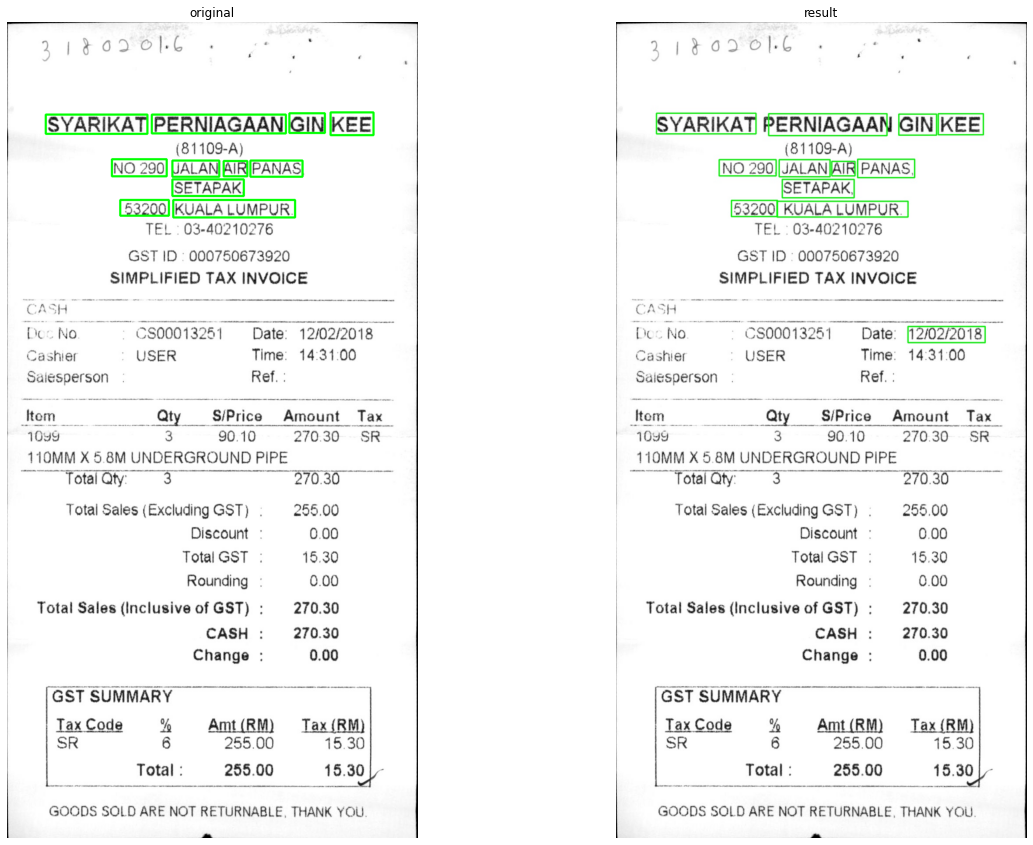

In [7]:
idx =1
path=img_path_list[idx]
original_img = cv2.imread(path)
bbox_path = re.sub('.jpg','.txt',path)
bbox = get_bbox_from_text(path=bbox_path)
yolo_bbox = from_yolo_to_bbox(original_img,bbox)
original_img = draw_boxes(original_img,yolo_bbox)
result_img =cv2.imread(result_path+'restult_'+path.split('\\')[-1])
# display_image_cv(original_img,'original')
# display_image_cv(result_img,'result')
# cv2.waitKey(0)
compareColorImage(original_img,result_img)